# Import

In [ ]:
from __future__ import print_function
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense
from keras.layers.core import Activation
from keras.layers import Dropout
from keras.optimizers import SGD
from keras.optimizers import Adam
from keras.utils import np_utils
np.random.seed(0)
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels
from sklearn.utils import shuffle

N_EPOCH = 20
BATCH_SIZE = 5
VERBOSE = 1
N_CLASS = 3
OPTIMIZER = SGD()
N_HIDDEN_1 = 128
VALIDATION_SPLIT = 0.2
RESHAPE = 784
DROPOUT = 0.01

# Read Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path_to_dataset = '/content/drive/MyDrive/Google_Colab/Vehicle-sensor/Dataset/'

In [ ]:
import pandas as pd
df_bus = pd.read_csv(path_to_dataset+'BUS.csv')
df_car = pd.read_csv(path_to_dataset+'CAR.csv')
df_cycle = pd.read_csv(path_to_dataset+'CYCLE.csv')

# Preprocess Dataset

In [ ]:
df_bus_6 = df_bus.iloc[:, 1:7]
df_car_6 = df_car.iloc[:, 1:7]
df_cycle_6 = df_cycle.iloc[:, 1:7]


df_bus_6_list = []
for i in range(30):
  df_bus_6_list.append(df_bus_6)

df_bus_6_10k = pd.concat(df_bus_6_list)


df_car_6_list = []
for i in range(10):
  df_car_6_list.append(df_car_6)

df_car_6_10k = pd.concat(df_car_6_list)


df_cycle_6_10k = df_cycle_6


bus_y = np.zeros(df_bus_6_10k.shape[0])
car_y = np.ones(df_car_6_10k.shape[0])
cycle_y = np.full((df_cycle_6_10k.shape[0], ), 2.0)


bus_y = bus_y.reshape((bus_y.shape[0],1))
car_y = car_y.reshape((car_y.shape[0],1))
cycle_y = cycle_y.reshape((cycle_y.shape[0],1))

X = np.vstack((df_bus_6_10k, df_car_6_10k, df_cycle_6_10k))

y = np.vstack((bus_y, car_y, cycle_y))

dataset = np.hstack((X,y))


print(dataset.shape)
print(X.shape, y.shape)

(31608, 7)
(31608, 6) (31608, 1)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

In [ ]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_train

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [ ]:
from keras.utils import to_categorical
y_test = to_categorical(y_test)
y_test

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [ ]:
INPUT_DIM = X_train.shape[1]
OUTPUT_DIM = np.unique(y_train).shape[0]
N_CLASS = OUTPUT_DIM


y_train = y_train.astype('int')
y_test = y_test.astype('int')



from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Artificial Neural Network Model

In [ ]:
classifier = Sequential()
classifier.add(Dense(units = 6, activation='relu', kernel_initializer='glorot_uniform', input_dim=6))
classifier.add(Dropout(DROPOUT))
classifier.add(Dense(units = 20, activation='relu', kernel_initializer = 'glorot_uniform'))
classifier.add(Dropout(DROPOUT))
classifier.add(Dense(units = 30, activation='relu', kernel_initializer = 'glorot_uniform'))
classifier.add(Dropout(DROPOUT))
classifier.add(Dense(units = 30, activation='relu', kernel_initializer = 'glorot_uniform'))
classifier.add(Dropout(DROPOUT))
classifier.add(Dense(units = 3, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model = classifier

# Train Model

In [ ]:
history = model.fit(X_train, y_train, batch_size = 30, epochs = 10, verbose = 1)

Epoch 1/10
1054/1054 [==============================] - 7s 4ms/step - loss: 0.5510 - accuracy: 0.7634
Epoch 2/10
1054/1054 [==============================] - 4s 3ms/step - loss: 0.2176 - accuracy: 0.9151
Epoch 3/10
1054/1054 [==============================] - 4s 3ms/step - loss: 0.1904 - accuracy: 0.9305
Epoch 4/10
1054/1054 [==============================] - 4s 3ms/step - loss: 0.1601 - accuracy: 0.9455
Epoch 5/10
1054/1054 [==============================] - 4s 4ms/step - loss: 0.1420 - accuracy: 0.9514
Epoch 6/10
1054/1054 [==============================] - 4s 3ms/step - loss: 0.1327 - accuracy: 0.9570
Epoch 7/10
1054/1054 [==============================] - 4s 3ms/step - loss: 0.1295 - accuracy: 0.9557
Epoch 8/10
1054/1054 [==============================] - 4s 4ms/step - loss: 0.1178 - accuracy: 0.9578
Epoch 9/10
1054/1054 [==============================] - 4s 4ms/step - loss: 0.1191 - accuracy: 0.9578
Epoch 10/10
1054/1054 [==============================] - 4s 3ms/step - loss: 0.112

# Test Model

In [ ]:
scores = model.evaluate(X_test, y_test, verbose=1)
print("Test Score: ", scores[0])
print("Accuracy: " , scores[1])

988/988 [==============================] - 3s 3ms/step - loss: 0.0895 - accuracy: 0.9686
Test Score:  0.08945921808481216
Accuracy:  0.9686155319213867


dict_keys(['loss', 'accuracy'])


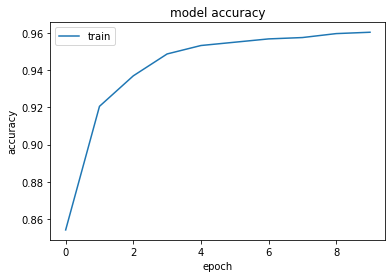

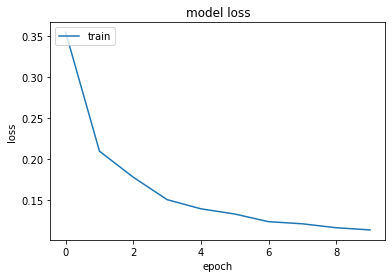

In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

Confusion matrix, without normalization
[[10380     0     0]
 [   30 10130   400]
 [   21   541 10106]]
Normalized confusion matrix
[[1.   0.   0.  ]
 [0.   0.96 0.04]
 [0.   0.05 0.95]]


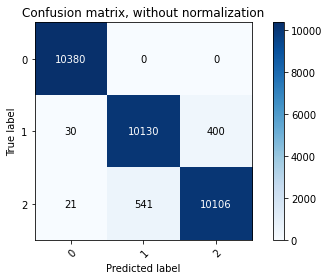

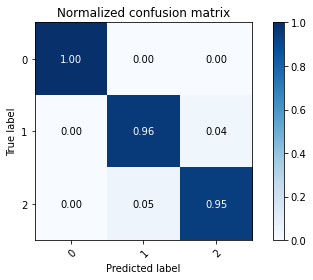

In [ ]:
from sklearn.metrics import confusion_matrix

class_names = np.array([0, 1, 2])

y_pred = model.predict(X_test)
y_test_argmax = y_test.argmax(axis=1)
y_pred_argmax = y_pred.argmax(axis=1)


# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test_argmax, y_pred_argmax, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test_argmax, y_pred_argmax, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()


# Visualize the Dataset

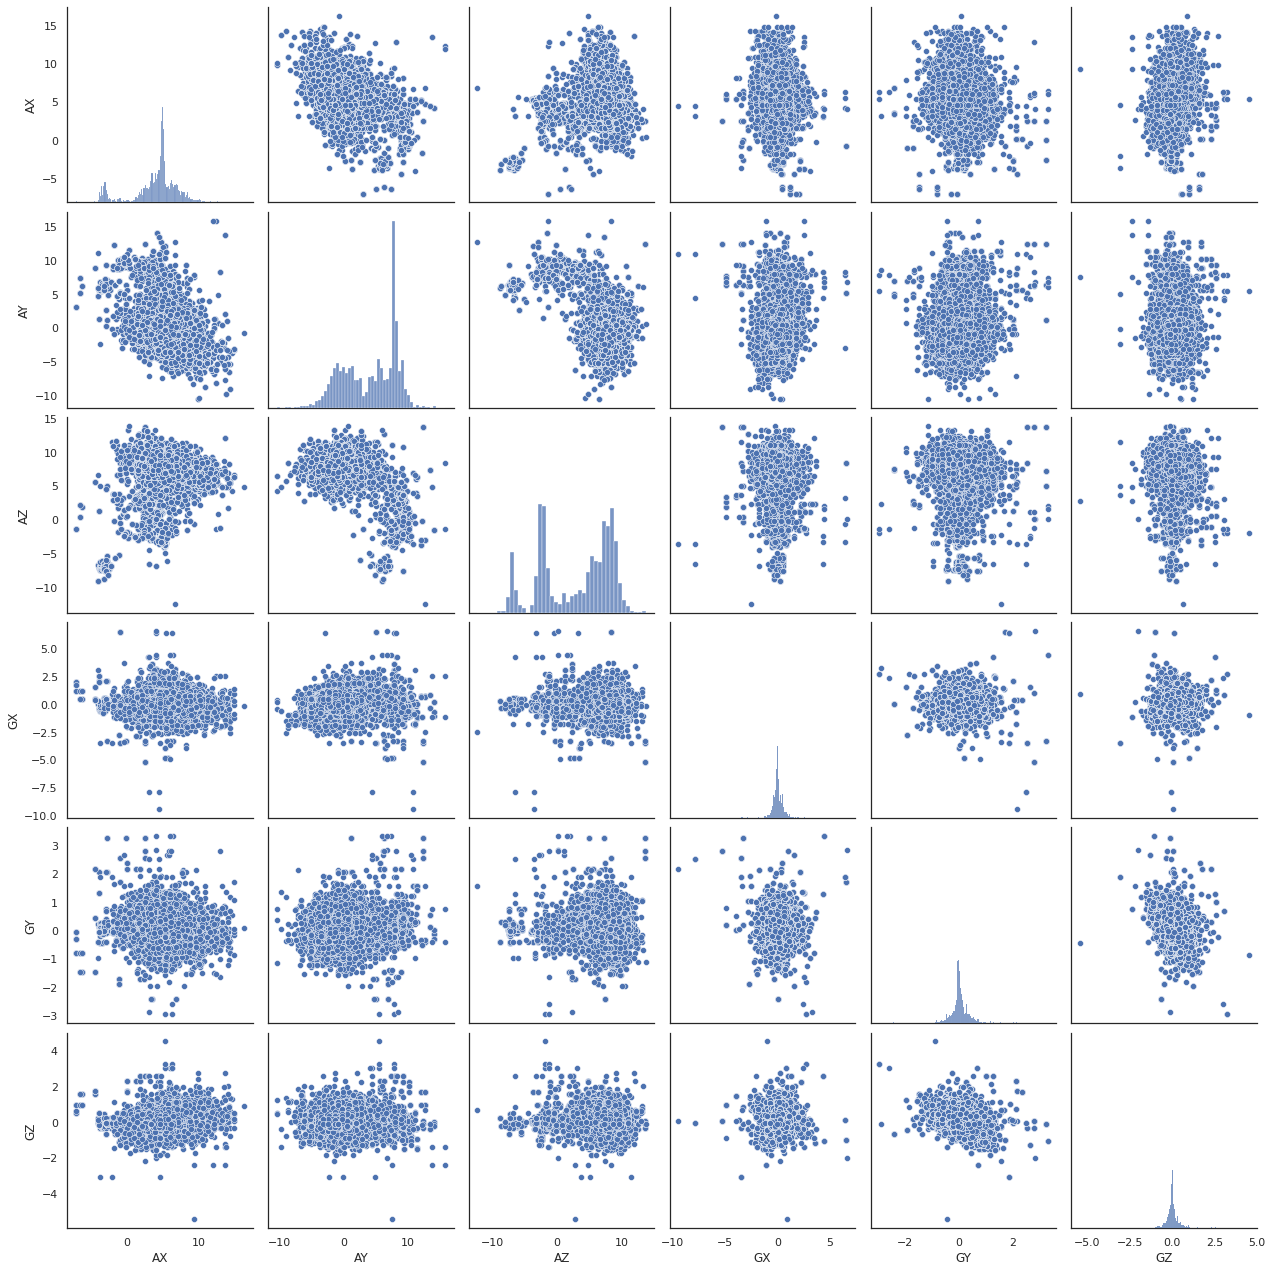

In [ ]:

import warnings 
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

df = pd.DataFrame(X, columns = ['AX','AY','AZ','GX','GY','GZ'])

sns.pairplot(df, size=3)

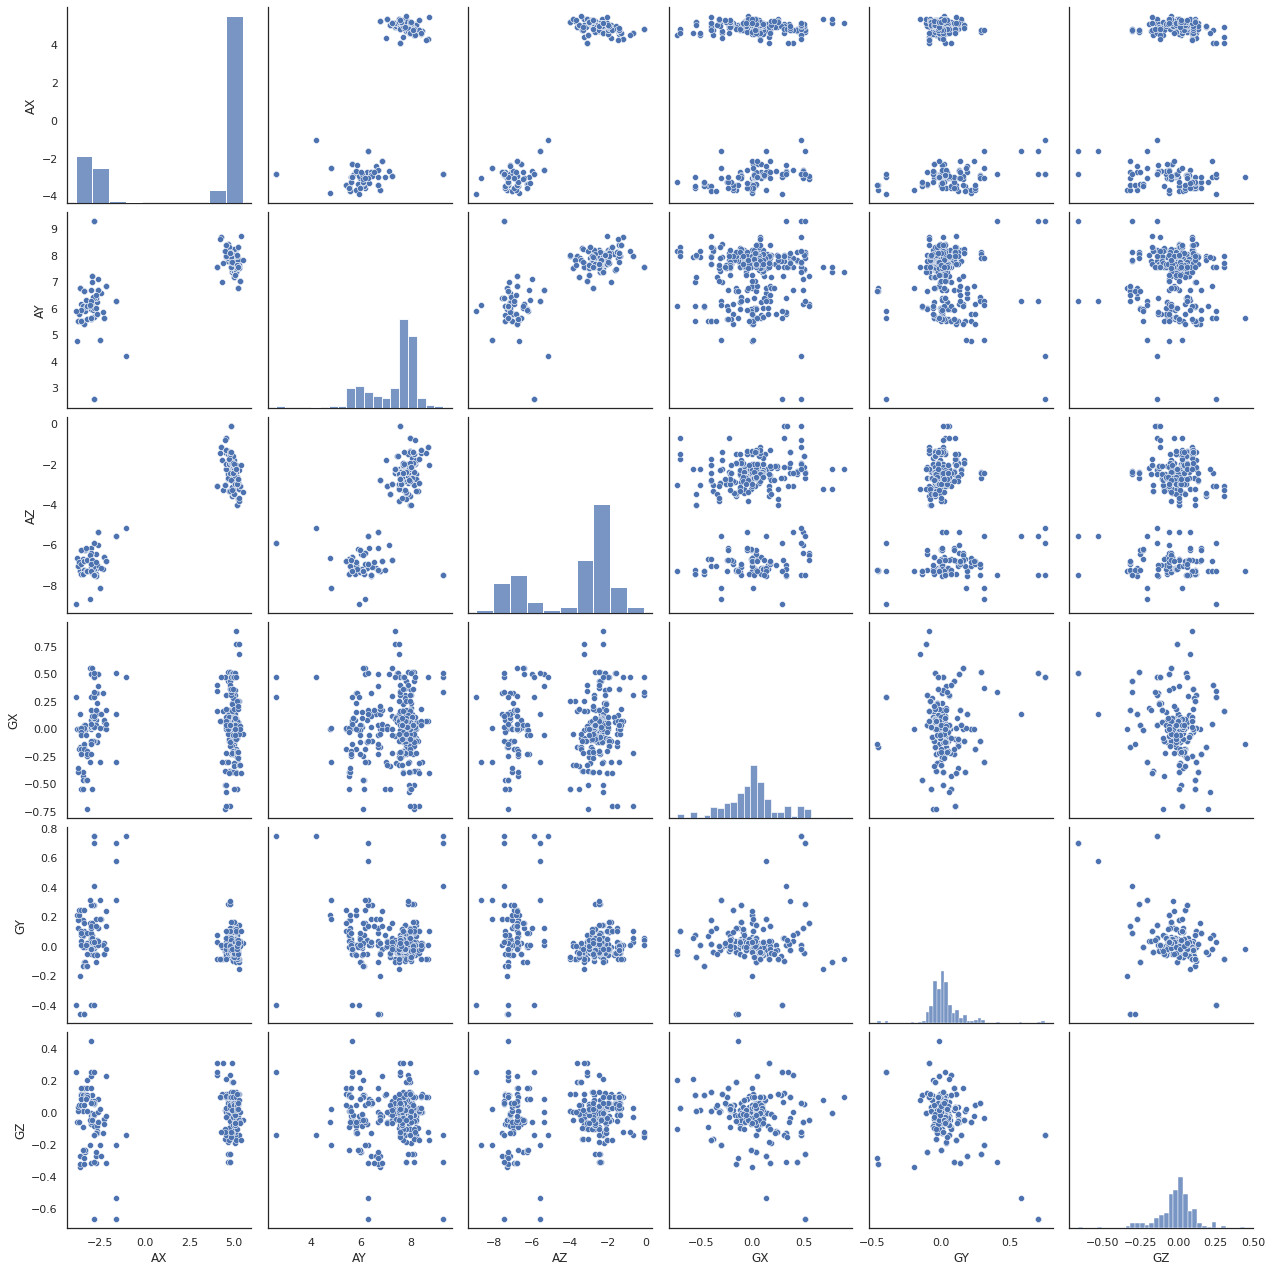

In [ ]:
df_bus_6 = np.array(df_bus_6)

df_bus_6 = pd.DataFrame(df_bus_6, columns = ['AX','AY','AZ','GX','GY','GZ'])

sns.pairplot(df_bus_6, size=3)

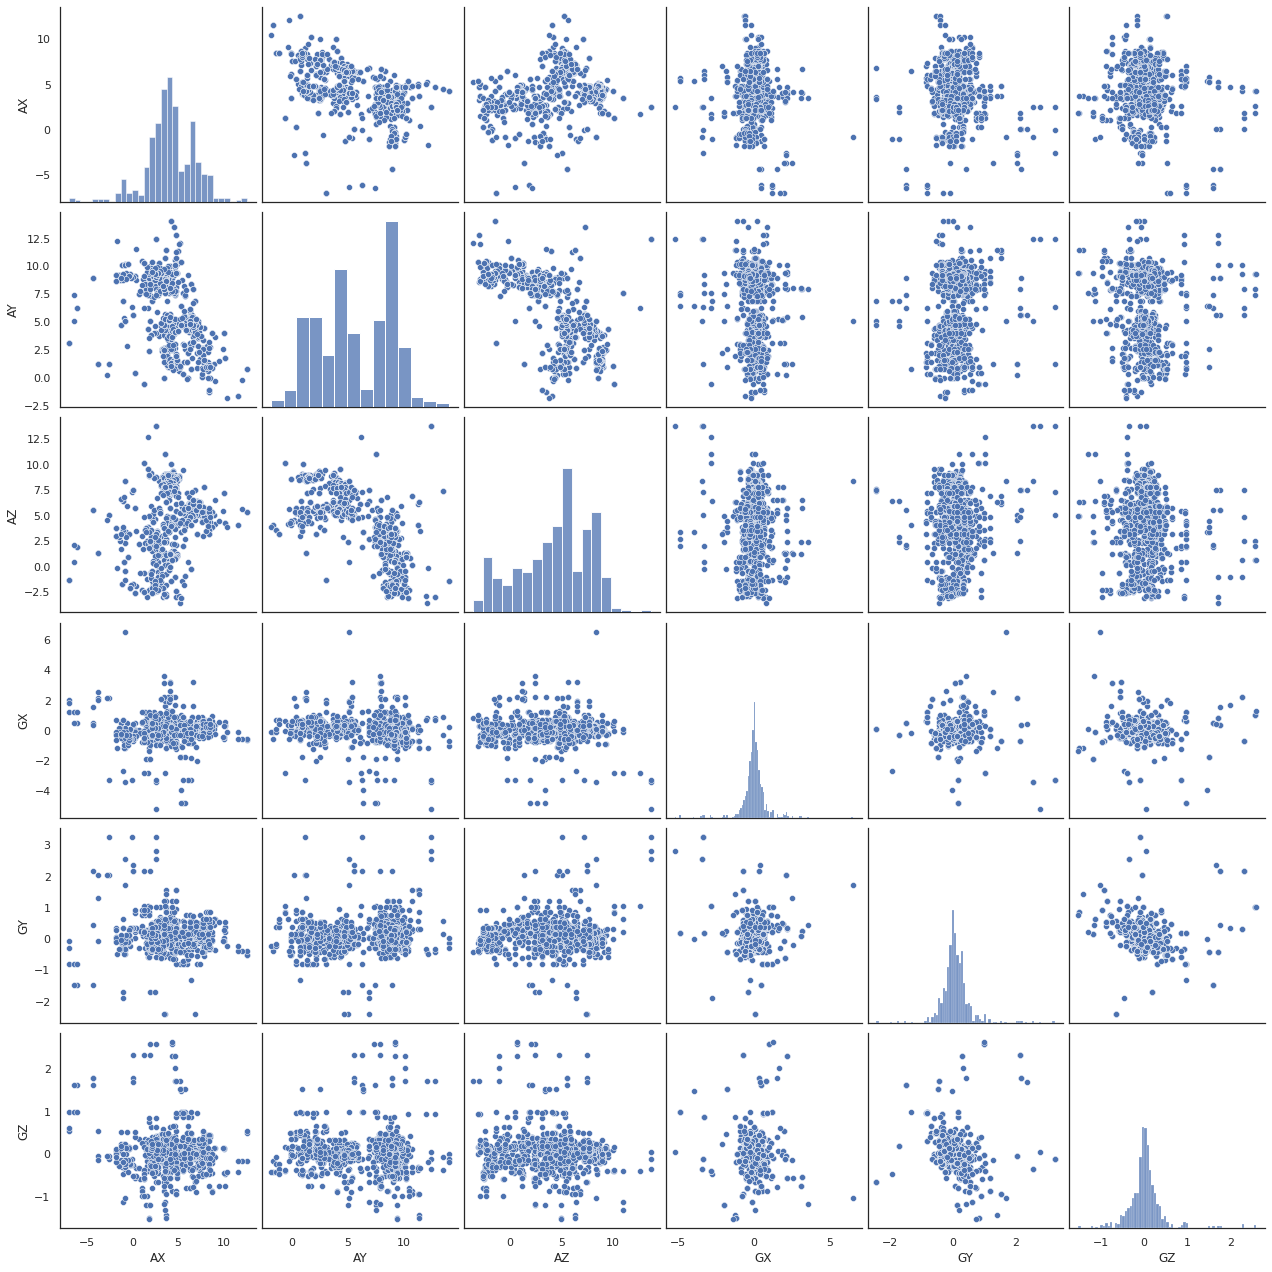

In [ ]:
df_car_6 = np.array(df_car_6)

df_car_6 = pd.DataFrame(df_car_6, columns = ['AX','AY','AZ','GX','GY','GZ'])

sns.pairplot(df_car_6, size=3)

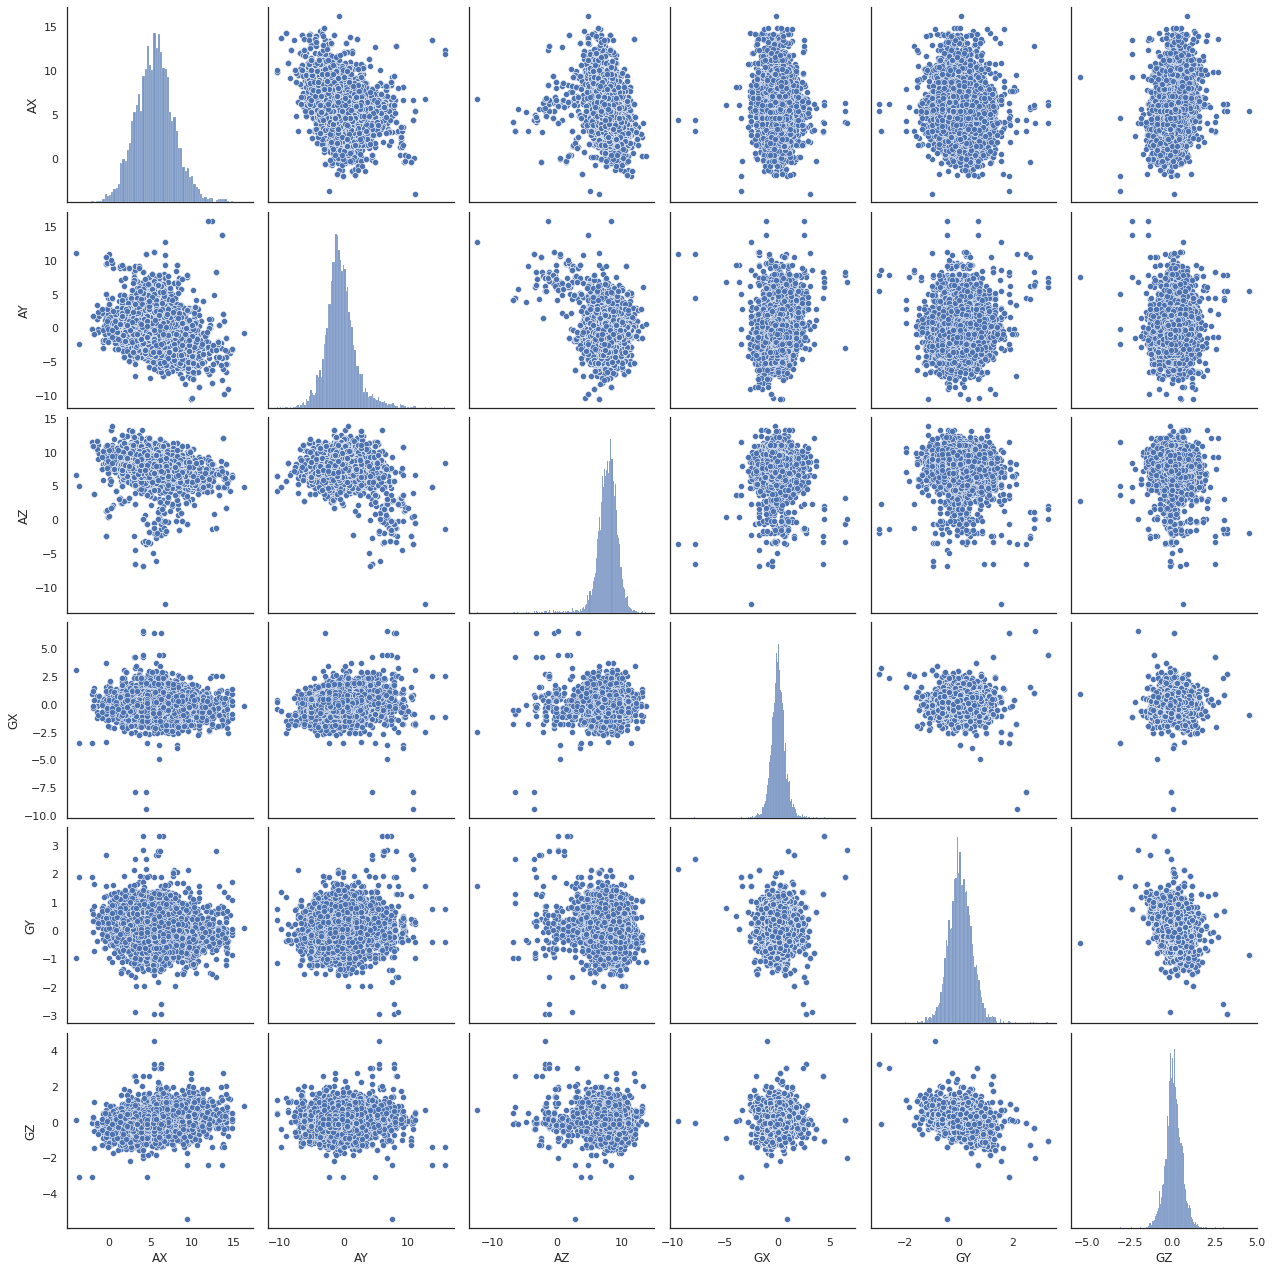

In [ ]:
df_cycle_6 = np.array(df_cycle_6)

df_cycle_6 = pd.DataFrame(df_cycle_6, columns = ['AX','AY','AZ','GX','GY','GZ'])

sns.pairplot(df_cycle_6, size=3)

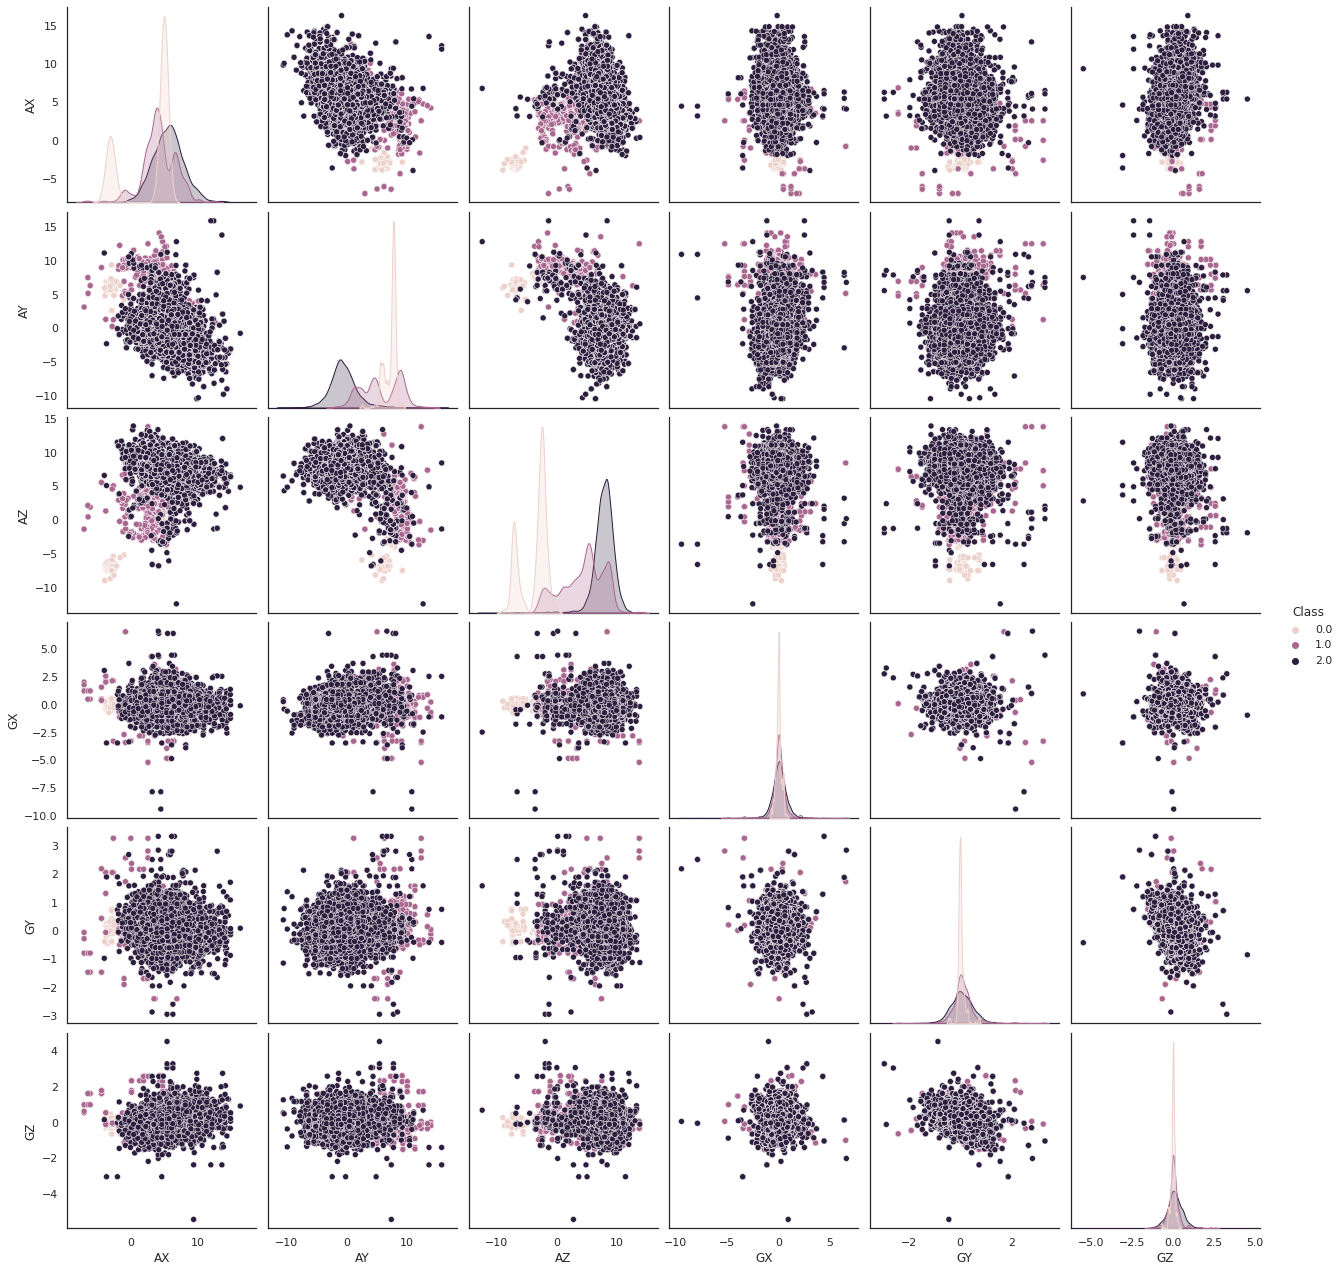

In [ ]:
dataset = np.array(dataset)

dataset = pd.DataFrame(dataset, columns = ['AX','AY','AZ','GX','GY','GZ', 'Class'])

sns.pairplot(dataset, hue='Class', size=3)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


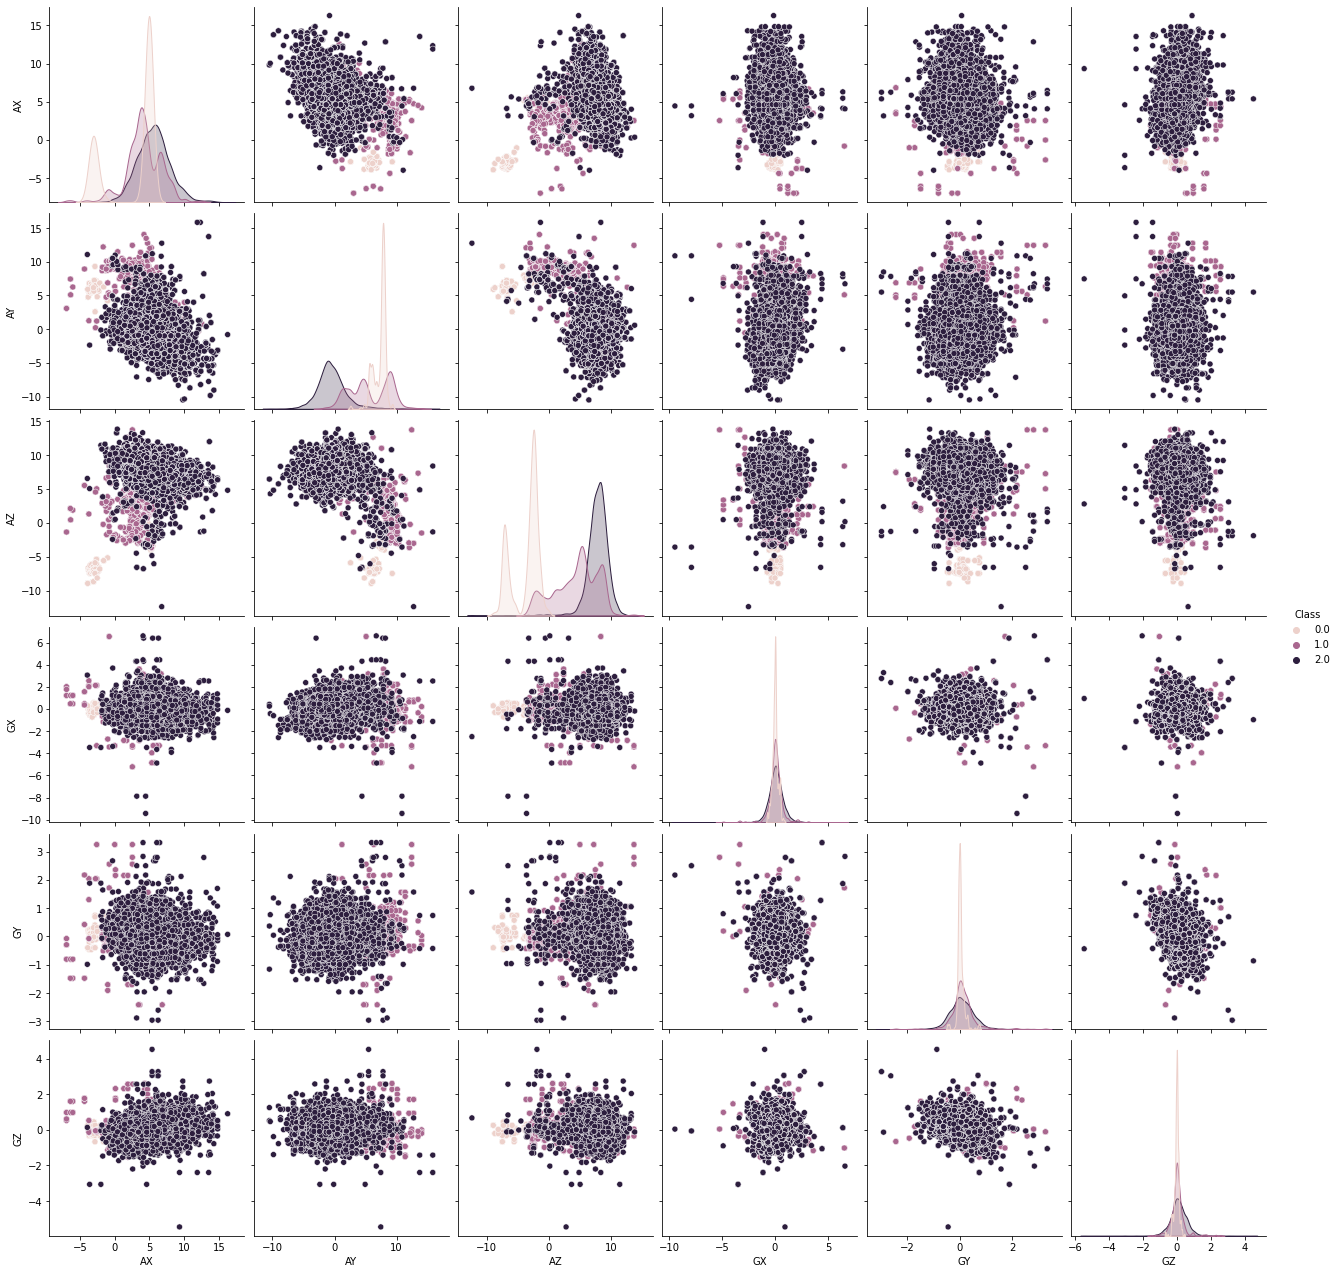

In [ ]:
import seaborn as sns

dataset = np.array(dataset)

dataset = pd.DataFrame(dataset, columns = ['AX','AY','AZ','GX','GY','GZ', 'Class'])

sns_plt = sns.pairplot(dataset, hue='Class', size=3)

sns_plt.savefig("output.png", dpi=600)

In [ ]:
sns_plt = sns.pairplot(dataset, hue='Class', kind="kde")

sns_plt.savefig("kde.png", dpi=600)

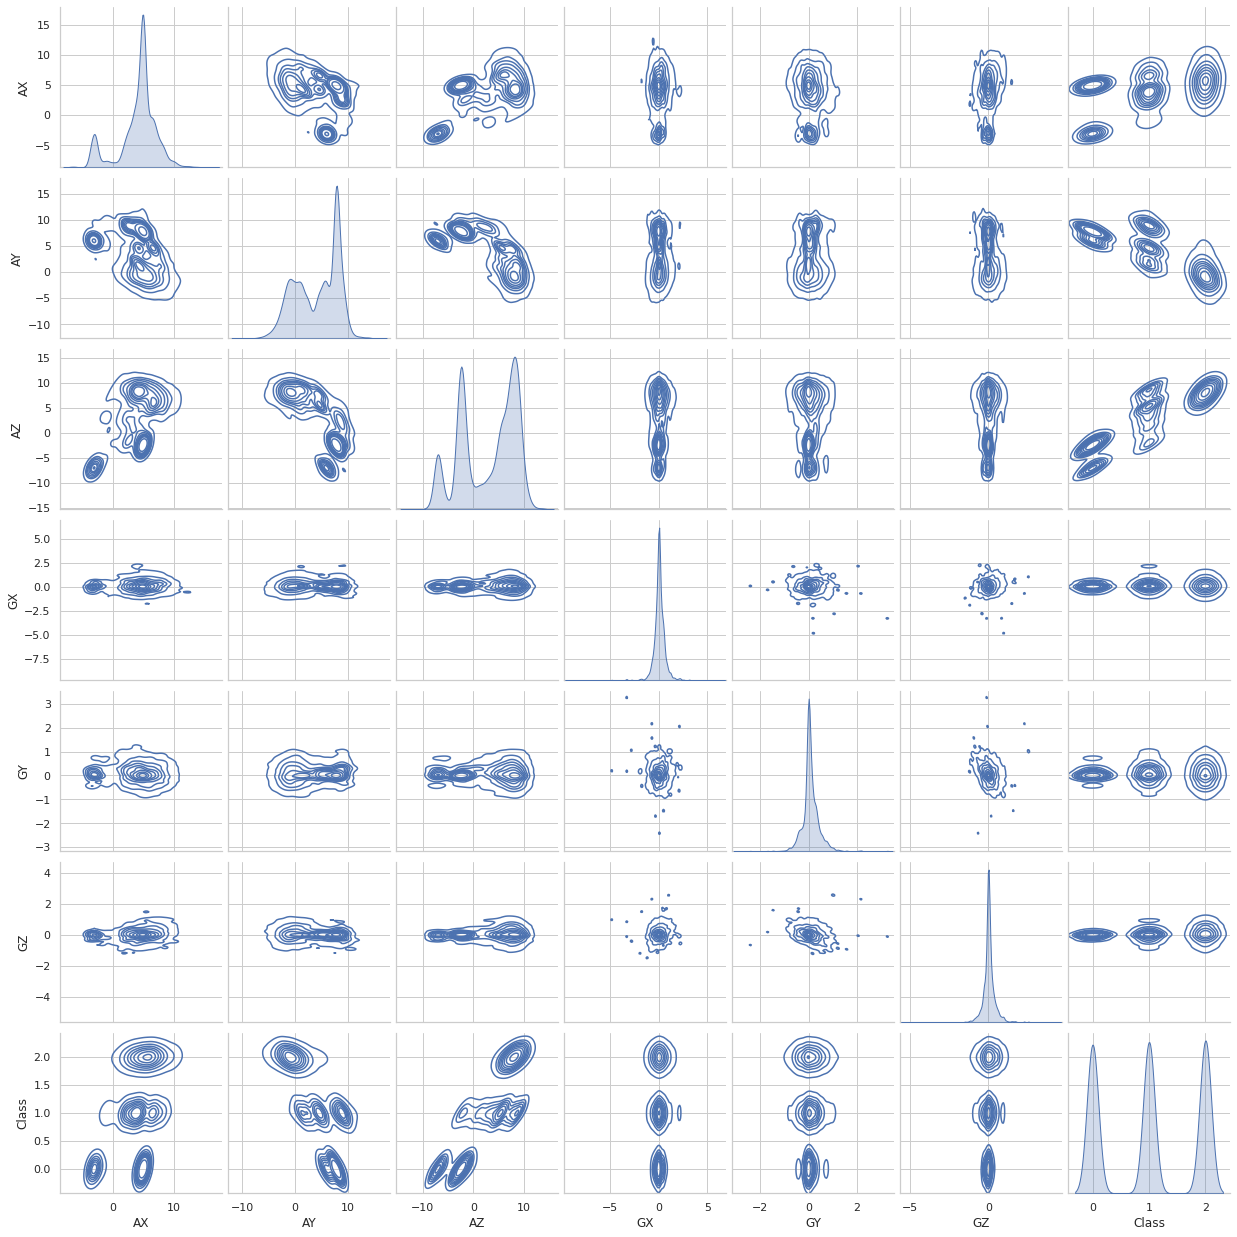

In [ ]:
sns.pairplot(dataset, kind="kde")

In [ ]:
sns.lineplot(data=dataset, palette="tab10", linewidth=2.5)

In [ ]:
df.to_csv(path_to_dataset + 'dataset_with_header.csv', index=False)

In [ ]:
df_bus_7 = df_bus.iloc[:, 0:7]

df_bus_7 = np.array(df_bus_7)

df_bus_7 = pd.DataFrame(df_bus_7, columns = ['Time Stamp', 'AX','AY','AZ','GX','GY','GZ'])

df_bus_7 = df_bus_7.set_index('Time Stamp')

df_bus_7

AX       AY       AZ          GX          GY         GZ
Time Stamp                                                                
17:13:44:518 -2.28993  5.64228 -6.58983  0.00610556   0.0232011 -0.0390756
17:13:44:535 -2.28993  5.64228 -6.58983   0.0598344  -0.0525078 -0.0427389
17:13:44:585 -2.28993  5.64228 -6.58983   0.0818144  -0.0525078 -0.0732667
17:13:44:615   -2.735  5.74277 -7.41296   0.0818144  -0.0525078 -0.0732667
17:13:44:623 -3.05324  6.22373 -7.14736   0.0818144  -0.0525078 -0.0732667
...               ...      ...      ...         ...         ...        ...
17:14:06:096   5.1685  7.61635  -3.0006    -0.25277  0.00732667  0.0500656
17:14:06:112   5.1685  7.61635  -3.0006   -0.213694           0  0.0378544
17:14:06:165   5.1685  7.61635  -3.0006   -0.212473   0.0402967  0.0183167
17:14:06:189   5.2666  7.57568 -2.75414   -0.212473   0.0402967  0.0183167
17:14:06:200   5.2666  7.57568 -2.75414   -0.261318   0.0207589  0.0561711

[346 rows x 6 columns]

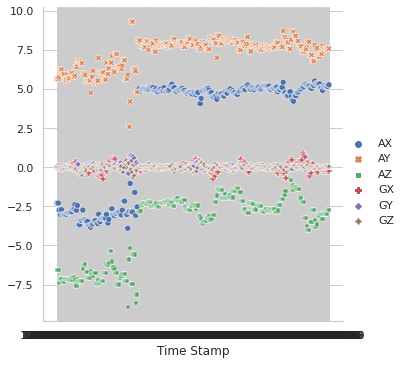

In [ ]:
# Plot the lines on two facets
sns.relplot(
    data=df_bus_7
)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

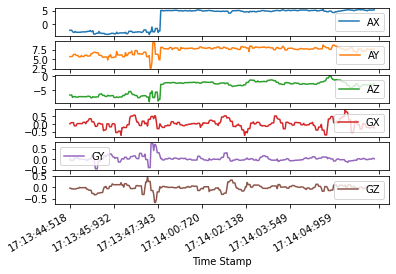

In [ ]:
from pandas import read_csv
from pandas import DataFrame
from pandas import Grouper
from matplotlib import pyplot
from google.colab import files


df_bus_7.plot(subplots=True, legend=True)
plt.savefig('bus_raw_data.png', dpi=500)
files.download('bus_raw_data.png') 
pyplot.show()

<Figure size 432x288 with 0 Axes>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

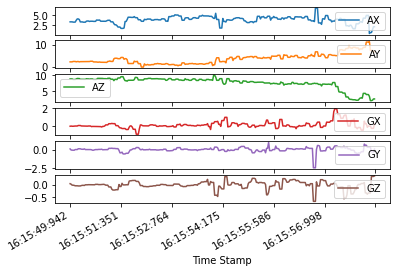

In [ ]:
df_bus_7 = df_car.iloc[:300, 0:7]

df_bus_7 = np.array(df_bus_7)

df_bus_7 = pd.DataFrame(df_bus_7, columns = ['Time Stamp', 'AX','AY','AZ','GX','GY','GZ'])

df_bus_7 = df_bus_7.set_index('Time Stamp')

df_bus_7.plot(subplots=True, legend=True)
plt.savefig('car_raw_data.png', dpi=500)
files.download('car_raw_data.png') 
pyplot.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

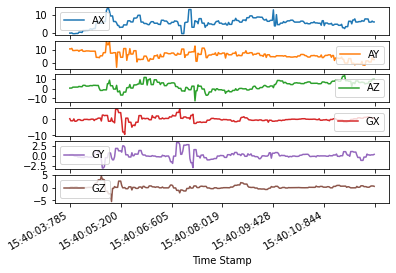

In [ ]:
df_bus_7 = df_cycle.iloc[:300, 0:7]

df_bus_7 = np.array(df_bus_7)

df_bus_7 = pd.DataFrame(df_bus_7, columns = ['Time Stamp', 'AX','AY','AZ','GX','GY','GZ'])

df_bus_7 = df_bus_7.set_index('Time Stamp')

df_bus_7.plot(subplots=True, legend=True)
plt.savefig('cycle_raw_data.png', dpi=500)
files.download('cycle_raw_data.png') 
pyplot.show()